#Raw Data as Bengaluru_House_Data.csv

In [60]:
import pandas as pd
import numpy as np

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
data = pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')

In [63]:
df = data.copy()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [65]:
data.head()  #price given in lakh rupees

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [66]:
# Finding for null values in each column

null_val = data.isnull().sum()
print(null_val)

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [67]:
# Finding for unique values in each column

for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

#alternate way is print(df.nunique())

area_type: 4
availability: 81
location: 1305
size: 31
society: 2688
total_sqft: 2117
bath: 19
balcony: 4
price: 1994


In [68]:
df.drop(columns=['area_type', 'availability', 'society'], inplace= True)

# inplace=False (default) returns a new DataFrame but inplace=True changes the original DataFrame.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [70]:
df.columns.str.strip()

Index(['location', 'size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

Handling null values (for location, size, bath, balcony):

In [71]:
df['location'].fillna('Whitefield', inplace = True)

/tmp/ipython-input-477350346.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna('Whitefield', inplace = True)


In [72]:
#Handleing outliers in locations (values with very less frequency and categorizing them as 'Other'):
df['location'] = (df['location'].str.strip() #move leading/trailing spaces
    .str.lower()                      # convert to lowercase
    .str.replace(r'\s+', ' ', regex=True)  # replace multiple spaces with single space
)
location_count = df['location'].value_counts()
location_count_less_than_20 = location_count[location_count < 20]

df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_than_20 else x)

In [73]:
df['location'].value_counts()

,count
location,
other,4208
whitefield,542
sarjapur road,399
electronic city,304
kanakpura road,273
...,...
ulsoor,21
sanjay nagar,20
hbr layout,20


In [74]:
df['size'].fillna('2 BHK', inplace = True)

/tmp/ipython-input-2897227082.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].fillna('2 BHK', inplace = True)


In [75]:
df.drop(columns=['balcony'], inplace = True)

In [76]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [77]:
bath_median = df['bath'].median()
df['bath'] = df['bath'].fillna(bath_median)

In [78]:
df.head(10)

,location,size,total_sqft,bath,price
0,electronic city phase ii,2 BHK,1056,2.0,39.07
1,other,4 Bedroom,2600,5.0,120.00
2,uttarahalli,3 BHK,1440,2.0,62.00
3,lingadheeranahalli,3 BHK,1521,3.0,95.00
4,kothanur,2 BHK,1200,2.0,51.00
5,whitefield,2 BHK,1170,2.0,38.00
6,old airport road,4 BHK,2732,4.0,204.00
7,rajaji nagar,4 BHK,3300,4.0,600.00
8,marathahalli,3 BHK,1310,3.0,63.25
9,other,6 Bedroom,1020,6.0,370.00


In [79]:
#Non-uniformity in size column:

df['BHK'] = df['size'].str.split().str.get(0).astype(int)

In [80]:
df['BHK'].value_counts()

,count
BHK,
2,5544
3,4857
4,1417
1,656
5,356
6,221
7,100
8,89
9,54


In [81]:
df.drop(columns = ['size'], inplace = True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   total_sqft  13320 non-null  object 
 2   bath        13320 non-null  float64
 3   price       13320 non-null  float64
 4   BHK         13320 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 520.4+ KB


In [83]:
df.describe()

,bath,price,BHK
count,13320.000000,13320.000000,13320.000000
mean,2.688814,112.565627,2.802778
std,1.338754,148.971674,1.294496
min,1.000000,8.000000,1.000000
25%,2.000000,50.000000,2.000000
50%,2.000000,72.000000,3.000000
75%,3.000000,120.000000,3.000000
max,40.000000,3600.000000,43.000000


In [84]:
df.head()

,location,total_sqft,bath,price,BHK
0,electronic city phase ii,1056,2.0,39.07,2
1,other,2600,5.0,120.00,4
2,uttarahalli,1440,2.0,62.00,3
3,lingadheeranahalli,1521,3.0,95.00,3
4,kothanur,1200,2.0,51.00,2


While trying to convert total_sqft to int datatype we got the error:
ValueError: invalid literal for int() with base 10: '2100 - 2850'
So that means, we are having values in range format in the total_sqft column, so we will change this range to a number and then it can be converted to numeric type

In [85]:
def rangeconvert(x):
  temp = x.split('-')
  if len(temp) == 2:
    return (float(temp[0]) + float(temp[1]))/2;
  try:
    return float(x)
  except:
    return None

In [86]:
#Applying the rangeconvert function to total_sqft column:

df['total_sqft'] = df['total_sqft'].apply(rangeconvert)

In [87]:
df.describe()

,total_sqft,bath,price,BHK
count,13274.000000,13320.000000,13320.000000,13320.000000
mean,1559.626694,2.688814,112.565627,2.802778
std,1238.405258,1.338754,148.971674,1.294496
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1276.000000,2.000000,72.000000,3.000000
75%,1680.000000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


In [88]:
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].median())

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   total_sqft  13320 non-null  float64
 2   bath        13320 non-null  float64
 3   price       13320 non-null  float64
 4   BHK         13320 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 520.4+ KB


In [90]:
df.describe()

,total_sqft,bath,price,BHK
count,13320.000000,13320.000000,13320.000000,13320.000000
mean,1558.647202,2.688814,112.565627,2.802778
std,1236.376834,1.338754,148.971674,1.294496
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1276.000000,2.000000,72.000000,3.000000
75%,1678.000000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


Creating some important features and trying to identifing the outliers

In [91]:
df['price_per_sqft_in_thousand'] = (df['price']* 100000 ) / (df['total_sqft'] * 1000)

In [92]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft_in_thousand
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,1558.647202,2.688814,112.565627,2.802778,7.919404
std,1236.376834,1.338754,148.971674,1.294496,106.247103
min,1.000000,1.000000,8.000000,1.000000,0.267830
25%,1100.000000,2.000000,50.000000,2.000000,4.266667
50%,1276.000000,2.000000,72.000000,3.000000,5.440000
75%,1678.000000,3.000000,120.000000,3.000000,7.328359
max,52272.000000,40.000000,3600.000000,43.000000,12000.000000


In [93]:
#Removing Outliers

df = df[df['total_sqft'] > 300]  #total sqft should be greater than 300
df = df[df['bath'] < df['BHK'] + 4]   #total bathrooms should be less than bhk + 4
df = df[(df['price_per_sqft_in_thousand']>=0.5) & (df['price_per_sqft_in_thousand']<30)]   #price range per square feet
df = df[df['BHK']<=20]  #less than or equal to 20bhk

#Cleaned Data

In [45]:
df.head()

,location,total_sqft,bath,price,BHK,price_per_sqft_in_thousand
0,electronic city phase ii,1056.0,2.0,39.07,2,3.699811
1,other,2600.0,5.0,120.00,4,4.615385
2,uttarahalli,1440.0,2.0,62.00,3,4.305556
3,lingadheeranahalli,1521.0,3.0,95.00,3,6.245891
4,kothanur,1200.0,2.0,51.00,2,4.250000


In [46]:
df.nunique()

,0
location,149
total_sqft,1979
bath,16
price,1982
BHK,17
price_per_sqft_in_thousand,7583


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13253 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    13253 non-null  object 
 1   total_sqft                  13253 non-null  float64
 2   bath                        13253 non-null  float64
 3   price                       13253 non-null  float64
 4   BHK                         13253 non-null  int64  
 5   price_per_sqft_in_thousand  13253 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 724.8+ KB


In [48]:
df.to_csv('Cleaned_data_BLR_house.csv')

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


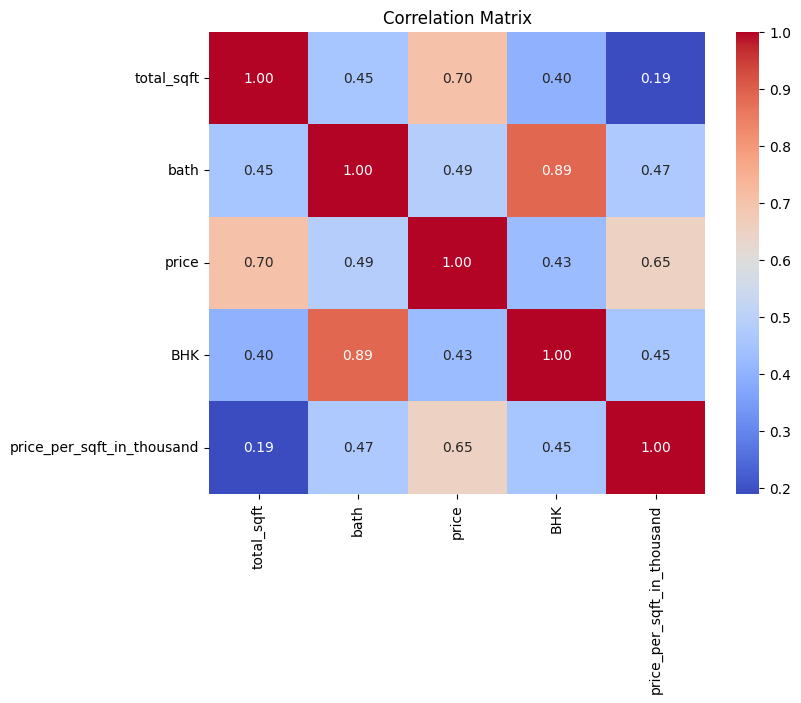

In [50]:
# Only numerical columns
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


#Simple- Linear Regression

In [97]:
# Features (excluding location)
X = df[['total_sqft']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

lr1 = LinearRegression()
lr1.fit(X_train, y_train)

y_pred1 = lr1.predict(X_test)

print("Simple- Linear Regression model")
print("R²:", r2_score(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))

Simple- Linear Regression model
R²: 0.5902681752431705
RMSE: 91.34282448115569


#Multi- Linear Regression


1. Without Encoding of categorical column : location

In [98]:
# Features (excluding location)
X = df[['total_sqft', 'bath']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

lr1 = LinearRegression()
lr1.fit(X_train, y_train)

y_pred1 = lr1.predict(X_test)

print("Model WITHOUT Location:")
print("R²:", r2_score(y_test, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))


Model WITHOUT Location:
R²: 0.589632967907397
RMSE: 93.47108909591407


2. With Encoding of categorical column : location

In [99]:
# One-hot encode
df_encoded = pd.get_dummies(df, columns=['location'], drop_first=True)
# drop_first=True avoids the dummy variable trap (multicollinearity) by removing one category per feature.

In [100]:
X2 = df_encoded.drop(['price'], axis=1)
y2 = df_encoded['price']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=10)

lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

y_pred2 = lr2.predict(X_test2)

print("Model WITH Location:")
print("R²:", r2_score(y_test2, y_pred2))
print("RMSE:", np.sqrt(mean_squared_error(y_test2, y_pred2)))


Model WITH Location:
R²: 0.8116914526565651
RMSE: 63.31783953293649


Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rf = RandomForestRegressor(n_estimators=200, random_state=10)
rf.fit(X_train2, y_train2)
y_pred_rf = rf.predict(X_test2)

print("Random Forest:")
print("R²:", r2_score(y_test2, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test2, y_pred_rf)))


Random Forest:
R²: 0.9593587773289224
RMSE: 29.4153793680448


XGBoost (Extreme Gradient Boosting)

In [103]:
from xgboost import XGBRegressor

In [104]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=10)
xgb.fit(X_train2, y_train2)
y_pred_xgb = xgb.predict(X_test2)

print("XGBoost:")
print("R²:", r2_score(y_test2, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test2, y_pred_xgb)))

XGBoost:
R²: 0.9395918287148458
RMSE: 35.86236411332964


✅ Random Forest → better here because dataset is small/medium and it gave higher accuracy.

✅ XGBoost → usually chosen for large datasets since it’s faster, more efficient, and has regularization to prevent overfitting.

# Saving the model for deployment with frontend

In [52]:
#pipeline:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [53]:
import joblib, pickle

In [54]:
df2 = pd.read_csv('Cleaned_data_BLR_house.csv')

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13253 entries, 0 to 13252
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  13253 non-null  int64  
 1   location                    13253 non-null  object 
 2   total_sqft                  13253 non-null  float64
 3   bath                        13253 non-null  float64
 4   price                       13253 non-null  float64
 5   BHK                         13253 non-null  int64  
 6   price_per_sqft_in_thousand  13253 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 724.9+ KB


In [56]:
df2.head()

,Unnamed: 0,location,total_sqft,bath,price,BHK,price_per_sqft_in_thousand
0,0,electronic city phase ii,1056.0,2.0,39.07,2,3.699811
1,1,other,2600.0,5.0,120.00,4,4.615385
2,2,uttarahalli,1440.0,2.0,62.00,3,4.305556
3,3,lingadheeranahalli,1521.0,3.0,95.00,3,6.245891
4,4,kothanur,1200.0,2.0,51.00,2,4.250000


In [105]:
X = df2.drop(columns=["price"])
y = df2["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

#  Define Preprocessing

numeric_features = ["total_sqft", "bath", "BHK", "price_per_sqft_in_thousand"]
categorical_features = ["location"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

#Pipeline Building:

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=200, random_state=5))
])

#Train

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R²: 0.9503774448504451
RMSE: 31.788069161129073


In [108]:
joblib.dump(pipeline, "house_price_pipeline.joblib")
# joblib.dump(pipeline, "house_price_pipeline_py37.joblib", protocol=4)
print("Pipeline saved as house_price_pipeline.joblib")

Pipeline saved as house_price_pipeline.joblib


In [109]:
# Load the original pipeline (protocol 5)
pipeline = joblib.load("house_price_pipeline_py37.joblib")

# Save again with pickle protocol 4 (compatible with Python 3.7)
with open("house_price_pipeline_py37_new.joblib", "wb") as f:
    pickle.dump(pipeline, f, protocol=4)

#Uploading the model in Hugging face hub


In [110]:
from huggingface_hub import login, create_repo, upload_file

In [39]:
login(token="sample_token_saved")

In [40]:
repo_id = "vedangmehta/house-price-predictor"
create_repo(repo_id=repo_id, repo_type="model", private=False, exist_ok=True)

RepoUrl('https://huggingface.co/vedangmehta/house-price-predictor', endpoint='https://huggingface.co', repo_type='model', repo_id='vedangmehta/house-price-predictor')

In [112]:
upload_file(
    path_or_fileobj="house_price_pipeline.joblib",    # local path on Colab
    path_in_repo="house_price_pipeline.joblib",       # filename inside HF repo
    repo_id=repo_id,
    repo_type="model",
    commit_message="Add compressed joblib model"
)

print("Uploaded to:", f"https://huggingface.co/{repo_id}")

Processing Files (0 / 0)                : |          |  0.00B /  0.00B            

New Data Upload                         : |          |  0.00B /  0.00B            

  house_price_pipeline.joblib           :   7%|7         | 8.36MB /  114MB            

No files have been modified since last commit. Skipping to prevent empty commit.


Uploaded to: https://huggingface.co/vedangmehta/house-price-predictor
